<a href="https://colab.research.google.com/github/oliviafelica/A_STUDY-CASE-1-DATMIN/blob/main/KELOMPOK_A_STUDY_CASE_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import seaborn as sns

In [82]:
df_bekasi = pd.read_csv("https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/bekasi.csv") 
df_bogor = pd.read_csv("https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/bogor.csv")
df_depok = pd.read_csv("https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/depok.csv")
df_jakarta = pd.read_csv("https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/jakarta.csv")
df_tangerang = pd.read_csv("https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/tangerang.csv")

In [83]:
df_jakarta.drop_duplicates(inplace=True)
print(df_jakarta.duplicated().sum()) # no more duplicates
print(df_jakarta.shape)

0
(122, 26)


# jakarta

In [84]:
df_jakarta.dropna(how='all', axis=1, inplace=True)

In [85]:
df_jakarta_baru = df_jakarta.fillna(0)

In [86]:
df_jakarta_baru1 = df_jakarta_baru.drop(labels=["created_at","deskripsi","URL","hadap"], axis=1)

In [87]:
#menghapus baris 121
df_jakarta_baru1 =df_jakarta_baru.drop([121])

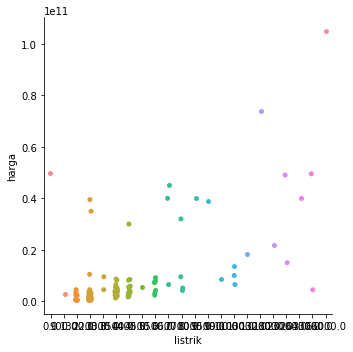

In [88]:
import seaborn as sns
p= sns.catplot(x="listrik", y="harga", data=df_jakarta_baru1)

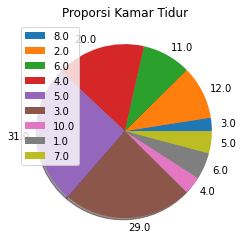

In [89]:
import matplotlib.pyplot as plt 
from collections import Counter
data = df_jakarta_baru1['KT']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('Proporsi Kamar Tidur')
plt.legend(labels, loc='best')
plt.show()

In [90]:
max_value = df_jakarta_baru1["harga"].max()#nilai tertinggi harga 
min_value = df_jakarta_baru1["harga"].min()#nilai terendah harga
min_value
max_value

105000000000.0



# depok


In [91]:
df_depok.info()

#memeriksa missing value
print(df_depok.isnull().sum())

#membuang kolom yang isinya missing value semua
df_depok=df_depok.drop(labels=['Unnamed: 14', 'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24', 'Unnamed: 25'], axis=1)

#mengganti missing value dengan 0
df_depok=df_depok.fillna(0)

#duplikat
df_depok.drop_duplicates(inplace=True)
print(df_depok.duplicated().sum()) # no more duplicates
print(df_depok.shape)

#menghapus baris 120 dan 121
df_depok=df_depok.drop([120,121])

#menghapus baris 118
df_depok=df_depok.drop([118])

df_depok=df_depok.drop(labels=["created_at","deskripsi","URL","hadap"], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [92]:
df_depok.describe()

,LB,KT,KM,garasi,carport,listrik,harga
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,92.618644,2.737288,1.940678,0.372881,1.330508,1874.576271,1194.440678
std,92.630404,1.024720,0.980950,0.958958,1.162484,1304.573575,1474.387409
min,15.000000,2.000000,1.000000,0.000000,0.000000,0.000000,41.000000
25%,46.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,485.000000
50%,61.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,810.000000
75%,102.250000,3.000000,2.000000,0.000000,2.000000,2200.000000,1137.500000
max,600.000000,7.000000,5.000000,6.000000,7.000000,10000.000000,9000.000000


In [93]:
#mengubah tipe data LT
df_depok['LT'] = df_depok['LT'].astype('float64')

In [94]:
#memeriksa missing value kembali
print(df_depok.isnull().sum())

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
dtype: int64


In [95]:
#melihat harga rumah termahal di depok
max_harga_depok = df_depok["harga"].max()
print(max_harga_depok)

#melihat harga rumah termurah di depok
min_harga_depok = df_depok["harga"].min()
print(min_harga_depok)

#melihat lb terluas
max_lb_depok = df_depok["LB"].max()
print(max_lb_depok)

#melihat lb terkecil
min_lb_depok = df_depok["LB"].min()
print(min_lb_depok)

9000.0
41.0
600.0
15.0


In [96]:
df_depok

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,165.0,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,2100.0
1,50.0,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,250.0
2,50.0,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,250.0
3,50.0,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,250.0
4,72.0,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,350.0
...,...,...,...,...,...,...,...,...,...,...
113,79.0,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,0.0,750.0
114,72.0,45.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,0.0,1000.0
115,40.0,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,195.0
116,50.0,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,185.0


#Tangerang

In [97]:
df_tangerang.drop_duplicates(inplace=True)
df_tangerang.dropna(how='all', axis=1, inplace=True)
df_tangerang = df_tangerang.drop([124])
df_tangerang = df_tangerang.fillna(0)
df_tangerang = df_tangerang.drop(labels=["created_at","deskripsi","URL","hadap"], axis=1)

# bogor

In [98]:
df_depok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          118 non-null    float64
 1   LB          118 non-null    float64
 2   KT          118 non-null    float64
 3   KM          118 non-null    float64
 4   garasi      118 non-null    float64
 5   carport     118 non-null    float64
 6   lokasi      118 non-null    object 
 7   sertifikat  118 non-null    object 
 8   listrik     118 non-null    float64
 9   harga       118 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.1+ KB


In [99]:
#membuang kolom yang isinya missing value semua
df_bogor.dropna(how='all',axis=1,inplace=True)
#mengganti missing value dengan 0
df_bogor = df_bogor.fillna(0)
#membuang duplikat
df_bogor.drop_duplicates(inplace=True)
print(df_bogor.duplicated().sum()) # no more duplicates
print(df_bogor.shape)
#menghapus baris 194
df_bogor = df_bogor.drop([193])
#menghapus kolom yang tidak diperlukan
df_bogor = df_bogor.drop(labels=["created_at","deskripsi","URL","hadap"], axis=1)
#ganti jenis variabel listrik
df_bogor['listrik'] = df_bogor['listrik'].astype('category')
df_bogor.dtypes

0
(194, 14)


LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik       category
harga          float64
dtype: object

In [100]:
#mengecek tipe kolom
df_bogor.dtypes

LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik       category
harga          float64
dtype: object

In [101]:
max_value_harga_bogor = df_bogor["harga"].max()
print(max_value_harga_bogor) #16,5M
min_value_harga_bogor = df_bogor["harga"].min()
print(min_value_harga_bogor) #65Jt
max_value_lb_bogor = df_bogor["LB"].max()
print(max_value_lb_bogor) #1200
min_value_lb_bogor = df_bogor["LB"].min()
print(min_value_lb_bogor) #21

16500000000.0
65000000.0
1200.0
21.0


#  Bekasi

In [121]:
df_bekasi.drop_duplicates(inplace=True)
df_bekasi.dropna(how='all',axis=1,inplace=True)
df_bekasi.drop(labels=["created_at","deskripsi","URL","hadap"], axis=1)

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08
1,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,4.400000e+08
2,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,6.990000e+08
3,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09
4,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09
...,...,...,...,...,...,...,...,...,...,...
103,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,8.500000e+08
104,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,2.500000e+08
105,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,3.000000e+08
106,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,2.500000e+08


In [122]:
df_bekasi['listrik'] = df_bekasi['listrik'].astype('category')
df_bekasi.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik       category
hadap           object
harga          float64
URL             object
deskripsi       object
dtype: object

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


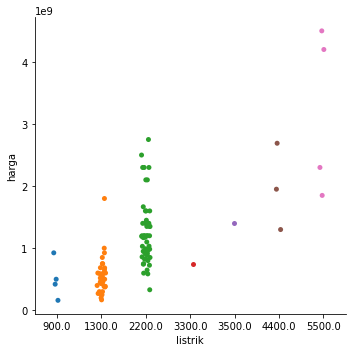

In [123]:
p= sns.catplot(x="listrik", y="harga", data=df_bekasi)

In [124]:
df_bekasi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,107.0,1.088224e+02,5.916491e+01,36.0,72.0,91.0,1.305000e+02,3.640000e+02
LB,107.0,1.106355e+02,7.175527e+01,30.0,60.0,90.0,1.440000e+02,4.940000e+02
KT,107.0,2.962617e+00,1.027226e+00,1.0,2.0,3.0,4.000000e+00,7.000000e+00
KM,106.0,1.943396e+00,8.488669e-01,1.0,1.0,2.0,2.750000e+00,4.000000e+00
garasi,33.0,1.090909e+00,2.919371e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
carport,81.0,1.086420e+00,2.827336e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
harga,107.0,1.074823e+09,7.516152e+08,160000000.0,580500000.0,920000000.0,1.350000e+09,4.500000e+09


In [125]:
df_bekasi.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LT                91.0
LB                90.0
KT                 3.0
KM                 2.0
garasi             1.0
carport            1.0
harga      920000000.0
dtype: float64

In [127]:
df_bekasi

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


#VISUAL

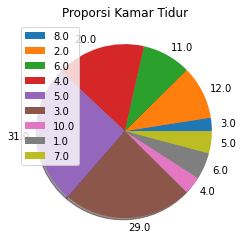

In [113]:
import matplotlib.pyplot as plt 
from collections import Counter
data = df_jakarta_baru1['KT']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('Proporsi Kamar Tidur')
plt.legend(labels, loc='best')
plt.show()

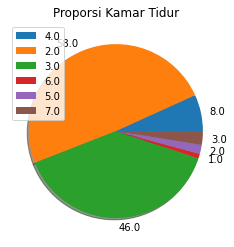

In [115]:
import matplotlib.pyplot as plt 
from collections import Counter
data_depok = df_depok['KT']

proporsion = Counter(data_depok)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('Proporsi Kamar Tidur')
plt.legend(labels, loc='best')
plt.show()

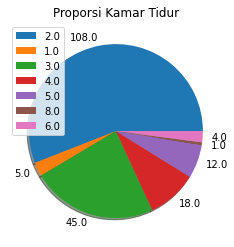

In [116]:
import matplotlib.pyplot as plt 
from collections import Counter
data_bogor = df_bogor['KT']

proporsion = Counter(data_bogor)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('Proporsi Kamar Tidur')
plt.legend(labels, loc='best')
plt.show()

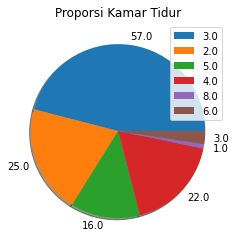

In [117]:
import matplotlib.pyplot as plt 
from collections import Counter
data_tgr = df_tangerang['KT']

proporsion = Counter(data_tgr)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('Proporsi Kamar Tidur')
plt.legend(labels, loc='best')
plt.show()

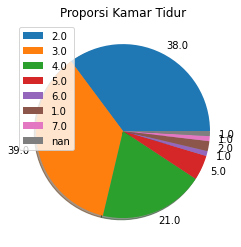

In [118]:
import matplotlib.pyplot as plt 
from collections import Counter
data_bks = df_bekasi['KT']

proporsion = Counter(data_bks)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
plt.pie(values, labels= values, shadow=True)
plt.title('Proporsi Kamar Tidur')
plt.legend(labels, loc='best')
plt.show()

Data yang dimiliki oleh perusahaan belum cukup bagus, karena didapati terlalu banyak duplikat, missing value, serta variabel yang tidak sesuai yang ada pada data yang diberikan dari kota Jakarta, Bogor, Depok, Tangerang, maupun Bekasi. Untuk perbaikan yang perlu dilakukan adalah ketika memasukkan suatu data ke database yang ada, hanya hal yang penting untuk diketahui saja karena pada data terlalu banyak variabel yang tidak memiliki arti yang jelas. 
Dari data yang telah didapatkan, kami melihat bahwa harga rumah di daerah yang bermobilitas pekerja tinggi, yaitu DKI Jakarta memiliki nilai jual rumah yang lebih tinggi dan lebih banyak diminati. Sedangkan, untuk harga rumah yang lebih murah kita dapatkan pada kota Depok. Dengan harga yang ada, mempengaruhi juga luas bangunan serta listrik yang digunakan. Rumah di daerah DKI Jakarta cenderung memiliki luas tanah yang lebih kecil dibandingkan dengan kota yang lain, tetapi memiliki harga jual rumah yang lebih tinggi. 
Median dari data Jakarta memiliki luas bangunan yang paling besar, yaitu sekitar 2000m^2 .
Dengan pengolahan data yang telah dilakukan, kami dapatkan bahwa karakteristik rumah yang dijual disetiap daerah JABODETABEK yaitu sekitar 1-3 kamar tidur. 
Jika RPPI ingin melakukan investasi, untuk budget sebesar 25 miliar, sebaiknya melakukan pembangunan rumah dengan 1-3 kamar tidur dengan luas tanah maupun luas bangunan yang lebih kecil agar harga yang dijual tidak terlalu mahal. 
Selanjutnya, menurut kami, sebaiknya, jika RPPI ingin membuat kantor cabang yang baru, kami merekomendasikan daerah DKI Jakarta karena mobilitasnya lebih tinggi dan merupakan ibukota Indonesia, serta memiliki penduduk yang cukup tinggi. Selain itu, variasi daya listrik yang ditawarkan di DKI Jakarta lebih beragam kota lainnya dalam data ini.